In [62]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
import statsmodels.graphics as graphics
import seaborn as sns
from sklearn import linear_model
%matplotlib inline
plt.style.use('ggplot')


In [10]:
# Generating the Data
np.random.seed(0)
X1 = np.linspace(0,1,100)
X2 = .5*X1 + (np.random.normal(0,1,100))/10
y = 2 + 2*X1 + .3*X2 + np.random.normal(0,1,100)



- Here Y is a response variable that is in linear relationship to X
- Here true values(Population values) of coefficients are :
    - Beta_0 = 2 , Beta_1 = 2 , Beta_2 = .3 
    - The error term is random error that is between 0 and 1

In [6]:
# Create a data frame
df = pd.DataFrame({'X1':X1,'X2':X2,'y':y})

In [7]:
df.head()

,X1,X2,y
0,0.000000,-0.023816,2.489404
1,0.010101,0.030061,1.695066
2,0.020202,-0.041433,0.451414
3,0.030303,-0.049129,3.948966
4,0.040404,-0.074573,1.620871


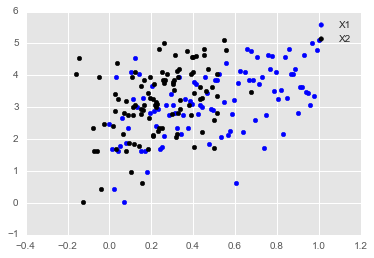

In [15]:
plt.scatter(x = df.X1 , y = df.y , color = 'b', label = 'X1')
plt.scatter(x = df.X2 , y = df.y , color = 'k', label = 'X2')
plt.legend(loc = 'best')

In [16]:
df.corr()

,X1,X2,y
X1,1.000000,0.837695,0.521639
X2,0.837695,1.000000,0.392060
y,0.521639,0.392060,1.000000


In [21]:
# creating X and Y variables for Sk learn
X = df[['X1','X2']]
y = df.y

In [27]:
model_sk = linear_model.LinearRegression()
model_sk = model_sk.fit(X,y)
model_sk.coef_

array([ 2.32121536, -0.89801864])

In [28]:
model_sm = smf.ols(formula = 'y~X1+X2', data=df).fit()

In [29]:
model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     18.76
Date:                Sun, 18 Sep 2016   Prob (F-statistic):           1.30e-07
Time:                        05:27:26   Log-Likelihood:                -129.93
No. Observations:                 100   AIC:                             265.9
Df Residuals:                      97   BIC:                             273.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.2222      0.179     12.401      0.000         1.867     2.578
X1             2.3212      0.566      4.103      0.000         1.198     3.444
X2            -0.8980      0.942     -0.954      0.343        -2.767     0.971
==============================================================================
Omnibus:                        5.746   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.057   Jarque-Bera (JB):                5.118
Skew:                          -0.516   Prob(JB):                       0.0774
Kurtosis:                       3.402   Cond. No.                         13.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Notes:
- Beta_0_hat = 2.22
- Beta_1_hat = 2.32
- Beta_2_hat = -.89
- population coefficients Beta_0 = 2 , Beta_1 = 2 , Beta_2 = .3
- Null Hypothesis , H0 is true for Beta_2, the feature X2 is not siginificant



In [30]:
model_linear_X1 =smf.ols(formula = 'y~X1', data=df).fit() 

In [31]:
model_linear_X1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.265
Method:                 Least Squares   F-statistic:                     36.64
Date:                Sun, 18 Sep 2016   Prob (F-statistic):           2.62e-08
Time:                        05:40:11   Log-Likelihood:                -130.40
No. Observations:                 100   AIC:                             264.8
Df Residuals:                      98   BIC:                             270.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.2330      0.179     12.493      0.000         1.878     2.588
X1             1.8692      0.309      6.053      0.000         1.256     2.482
==============================================================================
Omnibus:                        3.513   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.173   Jarque-Bera (JB):                2.978
Skew:                          -0.411   Prob(JB):                        0.226
Kurtosis:                       3.194   Cond. No.                         4.35
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
model_linear_X2 =smf.ols(formula = 'y~X2', data=df).fit() 

In [33]:
model_linear_X2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     17.80
Date:                Sun, 18 Sep 2016   Prob (F-statistic):           5.48e-05
Time:                        05:40:43   Log-Likelihood:                -137.93
No. Observations:                 100   AIC:                             279.9
Df Residuals:                      98   BIC:                             285.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.6074      0.164     15.851      0.000         2.281     2.934
X2             2.3381      0.554      4.219      0.000         1.238     3.438
==============================================================================
Omnibus:                        1.029   Durbin-Watson:                   1.881
Prob(Omnibus):                  0.598   Jarque-Bera (JB):                1.109
Skew:                          -0.226   Prob(JB):                        0.574
Kurtosis:                       2.750   Cond. No.                         6.05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Notes-
- Since X1 and X2 have a high degree of collinearity , when regressed together it is difficult to determine theie individual effect on to the response variable


In [34]:
df.head()

,X1,X2,y
0,0.000000,-0.023816,2.489404
1,0.010101,0.030061,1.695066
2,0.020202,-0.041433,0.451414
3,0.030303,-0.049129,3.948966
4,0.040404,-0.074573,1.620871


In [35]:
# Let's add an observation to this data frame and see the impact
df.tail()


,X1,X2,y
95,0.959596,0.381151,3.070373
96,0.969697,0.260906,5.029642
97,0.979798,0.513014,3.348457
98,0.989899,0.558632,4.782985
99,1.000000,0.548999,5.102703


In [46]:
# Adding the value at the bottom of the  Data Frmae as  last record:

df_temp = pd.DataFrame({'X1':.1,'X2':.8,'y':6},index=[0])
df = df.append(df_temp , ignore_index=True)

In [47]:
df.iloc[100]

X1    0.1
X2    0.8
y     6.0
Name: 100, dtype: float64

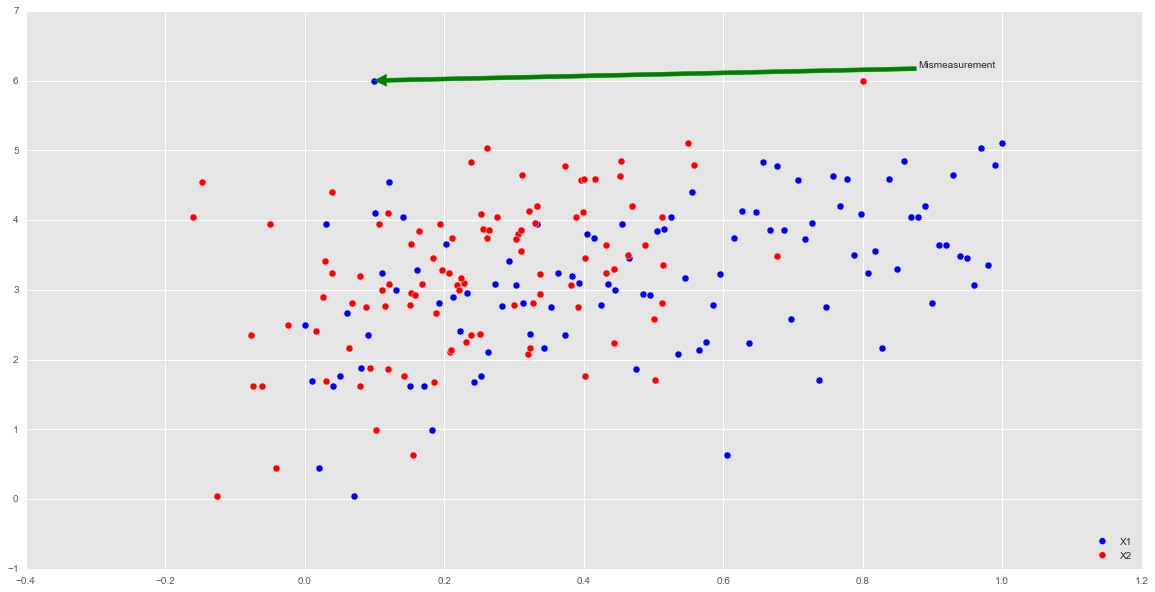

In [56]:
plt.figure(figsize=(20,10))
plt.scatter(x = df.X1 , y = df.y , c = 'b' , label = 'X1',s = 50)
plt.scatter(x = df.X2 , y = df.y , c = 'r' , label = 'X2',s = 50)
plt.annotate('Mismeasurement' , (df.X1[100],df.y[100]) , xytext=(.8,.9),textcoords='axes fraction',arrowprops = dict(facecolor='grey',color='g'))
plt.legend(loc = 'lower right')
plt.show()

In [57]:
sm_outlier_model = smf.ols(formula='y~X1',data= df).fit()

In [58]:
sm_outlier_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     27.13
Date:                Sun, 18 Sep 2016   Prob (F-statistic):           1.04e-06
Time:                        06:28:39   Log-Likelihood:                -138.55
No. Observations:                 101   AIC:                             281.1
Df Residuals:                      99   BIC:                             286.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.3497      0.189     12.458      0.000         1.975     2.724
X1             1.7055      0.327      5.209      0.000         1.056     2.355
==============================================================================
Omnibus:                        4.648   Durbin-Watson:                   1.804
Prob(Omnibus):                  0.098   Jarque-Bera (JB):                6.239
Skew:                           0.028   Prob(JB):                       0.0442
Kurtosis:                       4.216   Cond. No.                         4.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Notes
    - Adding the new data point widens the conf interval and reduces the quality of the fir(r_sq 21 v/s 27 earlier)
    - the estimated coefficient value Beta_1 = 1.7055(population Beta_1 is 2)

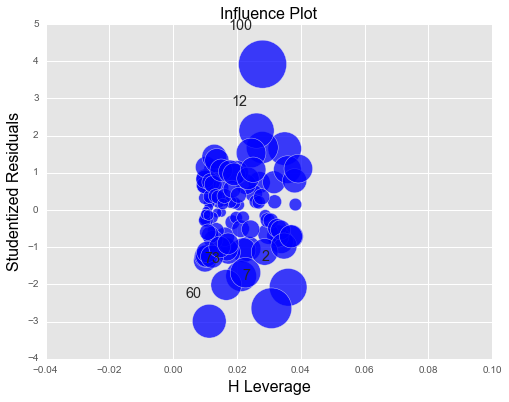

In [69]:
import statsmodels.api as sm

fig, ax = plt.subplots(figsize=(8,6))
fig = sm.graphics.influence_plot(sm_outlier_model, ax=ax,criterion="COOKS")



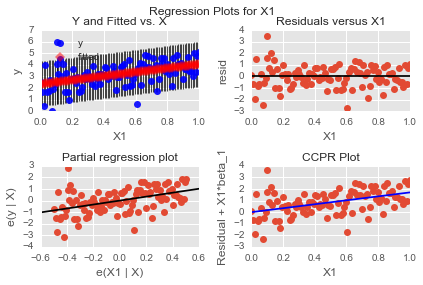

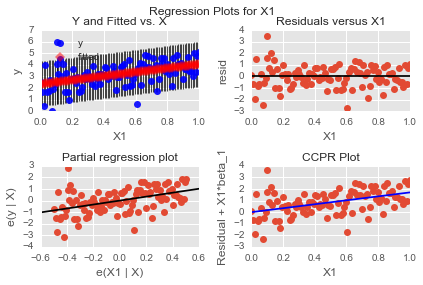

In [76]:
sm.graphics.plot_regress_exog(sm_outlier_model, 'X1')

Notes :- 
- THere is no ral pattern in residuals, but the new observation is clearly an outlier
- It does not have a high leveragre but is high on residuals